In [148]:
import pandas as pd

# Datasets

In [149]:
import dataframe_loading as df

## Users

In [150]:
users = df.LoadUsers()

In [151]:
users.head()

,current_age,retirement_age,birth_year,birth_month,gender,city,state,zipcode,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards
0,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,127613.0,787,5
1,53,68,1966,12,Female,Little Neck,NY,11363,37891.0,77254.0,191349.0,701,5
2,81,67,1938,11,Female,West Covina,CA,91792,22681.0,33483.0,196.0,698,5
3,63,63,1957,1,Female,New York,NY,10069,163145.0,249925.0,202328.0,722,4
4,43,70,1976,9,Male,San Francisco,CA,94117,53797.0,109687.0,183855.0,675,1


## Cards

In [152]:
cards = df.LoadCards()

In [153]:
cards.head()

,user,card_index,card_brand,card_type,card_number,expires_month,expires_year,cvv,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web
0,0,0,Visa,Debit,4344676511950444,12,2022,623,1,2,24295.0,9,2002,2008,0
1,0,1,Visa,Debit,4956965974959986,12,2020,393,1,2,21968.0,4,2014,2014,0
2,0,2,Visa,Debit,4582313478255491,2,2024,719,1,2,46414.0,7,2003,2004,0
3,0,3,Visa,Credit,4879494103069057,8,2024,693,0,1,12400.0,1,2003,2012,0
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,3,2009,75,1,1,28.0,9,2008,2009,0


## Transactions

In [154]:
raw_transactions = df.LoadRawTransactions()

In [155]:
raw_transactions.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


In [156]:
transactions = df.refactorTransactions(raw_transactions)

Column names made lowercase and spaces removed.
Space removed from card method
Amount parsed into float.
Time split into month, day, hour, and minute
Fraud column changed to 1 and 0
Error column fixed.


In [157]:
transactions['purchase_zip'] = transactions['zip']
transactions = transactions.drop('zip', axis=1)


In [158]:
transactions.head()

,user,card,year,month,day,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
0,0,0,2002,9,1,134.089996,Swipe,La Verne,CA,5300,06,21,0,None,91750.0
1,0,0,2002,9,1,38.480000,Swipe,Monterey Park,CA,5411,06,42,0,None,91754.0
2,0,0,2002,9,2,120.339996,Swipe,Monterey Park,CA,5411,06,22,0,None,91754.0
3,0,0,2002,9,2,128.949997,Swipe,Monterey Park,CA,5651,17,45,0,None,91754.0
4,0,0,2002,9,3,104.709999,Swipe,La Verne,CA,5912,06,23,0,None,91750.0


In [159]:
transactionErrors = transactions['errors'].value_counts()
print(transactionErrors)

errors
None                                                   23998469
Insufficient Balance                                     242783
Bad PIN                                                   58918
Technical Glitch                                          48157
Bad Card Number                                           13321
Bad CVV                                                   10740
Bad Expiration                                            10716
Bad Zipcode                                                2079
Bad PIN,Insufficient Balance                                581
Insufficient Balance,Technical Glitch                       457
Bad PIN,Technical Glitch                                    128
Bad Card Number,Insufficient Balance                        122
Bad CVV,Insufficient Balance                                 89
Bad Expiration,Insufficient Balance                          78
Bad Card Number,Bad CVV                                      60
Bad Card Number,Bad Expiration   

Started to split the errors column but stumbled upon some trouble

In [160]:
errorTypes = []

for e in transactionErrors.index:
    for s in e.split(','):
        if s not in errorTypes:
            errorTypes.append(s)

# for i in range(len(errorTypes)):
#     errorTypes[i] = errorTypes[i].replace(' ', '_').lower()

# errorTypes.remove('none')

print(errorTypes)

['None', 'Insufficient Balance', 'Bad PIN', 'Technical Glitch', 'Bad Card Number', 'Bad CVV', 'Bad Expiration', 'Bad Zipcode']


In [161]:
# for e in errorTypes:
#     errorT = e.replace(' ', '_').lower()
#     transactions[errorT] = 0
#     transactions[errorT] = np.where(e in string(transactions.errors), df.errorT, 1)

## Merging Dataframes

In [162]:
users["user"] = users.index

In [163]:
users

,current_age,retirement_age,birth_year,birth_month,gender,city,state,zipcode,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,user
0,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,127613.0,787,5,0
1,53,68,1966,12,Female,Little Neck,NY,11363,37891.0,77254.0,191349.0,701,5,1
2,81,67,1938,11,Female,West Covina,CA,91792,22681.0,33483.0,196.0,698,5,2
3,63,63,1957,1,Female,New York,NY,10069,163145.0,249925.0,202328.0,722,4,3
4,43,70,1976,9,Male,San Francisco,CA,94117,53797.0,109687.0,183855.0,675,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,32,70,1987,7,Male,Freeport,NY,11520,23550.0,48010.0,87837.0,703,3,1995
1996,62,65,1957,11,Female,Independence,KY,41051,24218.0,49378.0,104480.0,740,4,1996
1997,47,67,1973,1,Female,Elizabeth,NJ,7201,15175.0,30942.0,71066.0,779,3,1997
1998,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,27241.0,618,1,1998


In [164]:
cards

,user,card_index,card_brand,card_type,card_number,expires_month,expires_year,cvv,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web
0,0,0,Visa,Debit,4344676511950444,12,2022,623,1,2,24295.0,9,2002,2008,0
1,0,1,Visa,Debit,4956965974959986,12,2020,393,1,2,21968.0,4,2014,2014,0
2,0,2,Visa,Debit,4582313478255491,2,2024,719,1,2,46414.0,7,2003,2004,0
3,0,3,Visa,Credit,4879494103069057,8,2024,693,0,1,12400.0,1,2003,2012,0
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,3,2009,75,1,1,28.0,9,2008,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,1997,1,Amex,Credit,300609782832003,1,2024,663,1,1,6900.0,11,2000,2013,0
6142,1997,2,Visa,Credit,4718517475996018,1,2021,492,1,2,5700.0,4,2012,2012,0
6143,1998,0,Mastercard,Credit,5929512204765914,8,2020,237,0,2,9200.0,2,2012,2012,0
6144,1999,0,Mastercard,Debit,5589768928167462,1,2020,630,1,1,28074.0,1,2020,2020,0


In [165]:
combined = pd.merge(left=users, right=cards, left_on="user", right_on="user", how="inner")
combined.head()

,current_age,retirement_age,birth_year,birth_month,gender,city,state,zipcode,per_capita_income_zipcode,yearly_income_person,...,expires_month,expires_year,cvv,has_chip,cards_issued,credit_limit,acct_open_month,acct_open_year,year_pin_last_changed,card_on_dark_web
0,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,12,2022,623,1,2,24295.0,9,2002,2008,0
1,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,12,2020,393,1,2,21968.0,4,2014,2014,0
2,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,2,2024,719,1,2,46414.0,7,2003,2004,0
3,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,8,2024,693,0,1,12400.0,1,2003,2012,0
4,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,3,2009,75,1,1,28.0,9,2008,2009,0


In [166]:
combined['user'].value_counts()

user
1327    9
729     9
116     9
1098    8
1425    8
       ..
1610    1
717     1
1605    1
741     1
1000    1
Name: count, Length: 2000, dtype: int64

### Train Set
Obtained by grabbing all fraudulent transactions from 2015 and adding 5000 random non-fraudulent ones.

In [167]:
transactions['is_fraud'] = transactions['is_fraud'].replace('Yes', 1)

In [168]:
transactions['is_fraud'].value_counts()

is_fraud
0    24357143
1       29757
Name: count, dtype: int64

In [169]:
transactions['use_chip'].value_counts()

use_chip
Swipe     15386082
Chip       6287598
Online     2713220
Name: count, dtype: int64

In [170]:
fraud = transactions.query("year == 2015 and is_fraud == 1")
fraud

,user,card,year,month,day,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
4099,0,0,2015,11,15,287.130005,Online,ONLINE,None,3001,12,55,1,None,0.0
4100,0,0,2015,11,15,2.410000,Online,ONLINE,None,5651,13,19,1,None,0.0
4101,0,0,2015,11,16,50.810001,Online,ONLINE,None,4411,09,41,1,None,0.0
4102,0,0,2015,11,16,248.360001,Online,ONLINE,None,5732,09,46,1,None,0.0
4103,0,0,2015,11,16,473.000000,Online,ONLINE,None,3640,11,20,1,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24220497,1983,3,2015,7,8,3.060000,Online,ONLINE,None,5311,15,51,1,None,0.0
24220499,1983,3,2015,7,10,58.669998,Online,ONLINE,None,3256,13,16,1,None,0.0
24220500,1983,3,2015,7,10,155.639999,Chip,Dubberly,LA,5300,14,17,1,None,71024.0
24220501,1983,3,2015,7,10,19.290001,Online,ONLINE,None,5816,15,39,1,None,0.0


In [171]:
nonfraud = transactions.query("year == 2015 and is_fraud == 0")
nonfraud

,user,card,year,month,day,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
3895,0,0,2015,1,2,34.990002,Chip,Monterey Park,CA,5411,06,58,0,None,91754.0
3896,0,0,2015,1,2,1.670000,Chip,La Verne,CA,5499,11,54,0,None,91750.0
3897,0,0,2015,1,2,208.960007,Chip,Mira Loma,CA,4814,20,23,0,None,91752.0
3898,0,0,2015,1,4,136.580002,Chip,La Verne,CA,5300,06,27,0,None,91750.0
3899,0,0,2015,1,4,128.639999,Chip,Monterey Park,CA,5651,16,54,0,None,91754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24379102,1998,0,2015,12,30,8.010000,Swipe,Lebanon,PA,4214,14,57,0,None,17042.0
24379103,1998,0,2015,12,30,21.950001,Swipe,Camp Hill,PA,5814,17,17,0,None,17011.0
24379104,1998,0,2015,12,30,36.709999,Online,ONLINE,None,4121,18,38,0,None,0.0
24379105,1998,0,2015,12,31,-0.110000,Swipe,Carlisle,PA,5812,06,49,0,None,17015.0


#### Oversampling Train Set Fraud Data to Balance it

In [172]:
FRAUD_SIZE = 3000

In [173]:
balanced_fraud1 = fraud.sample(n=int(FRAUD_SIZE/2))
balanced_fraud2 = fraud.sample(n=int(FRAUD_SIZE/2))
balanced_fraud3 = fraud.sample(n=int(FRAUD_SIZE/2))

fraud = pd.concat([balanced_fraud1, balanced_fraud2, balanced_fraud3])

#### Merging Fraud and Non-Fraud into one Dataset

In [174]:

# To preserve the ratio of purchase method I'm first getting the subset from the subset and then splitting it manually
ratios = [0.71, 0.17, 0.12]
ratios = [x * 3000 for x in ratios]
print(ratios)

swipe_transactions = nonfraud.query("use_chip == 'Swipe'").sample(n=int(ratios[0]))
chip_transactions = nonfraud.query("use_chip == 'Chip'").sample(n=int(ratios[1]))
online_transactions = nonfraud.query("use_chip == 'Online'").sample(n=int(ratios[2]))

train_set = pd.concat([swipe_transactions, chip_transactions, online_transactions, fraud])

[2130.0, 510.00000000000006, 360.0]


In [175]:
train_set = pd.merge(left=combined, right=train_set, left_on=['user', 'card_index'], right_on=['user', 'card'], how="inner")

In [176]:
train_set

,current_age,retirement_age,birth_year,birth_month,gender,city,state,zipcode,per_capita_income_zipcode,yearly_income_person,...,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
0,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,473.000000,Online,ONLINE,None,3640,11,20,1,None,0.0
1,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,144.490005,Online,ONLINE,None,3007,11,34,1,None,0.0
2,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,97.339996,Online,ONLINE,None,7922,15,59,1,None,0.0
3,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,248.360001,Online,ONLINE,None,5732,09,46,1,None,0.0
4,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,17.860001,Online,ONLINE,None,5311,16,05,1,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,18.889999,Swipe,Camp Hill,PA,5411,16,04,0,None,17011.0
7496,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,77.400002,Swipe,Camp Hill,PA,5310,22,40,0,None,17011.0
7497,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,15.440000,Swipe,Cheshire,CT,9402,15,22,0,None,6410.0
7498,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,65.320000,Swipe,New York,NY,7538,15,28,0,None,10035.0


### Validation Set

In [177]:
fraud = transactions.query("year > 2015 and is_fraud == 1")
fraud

,user,card,year,month,day,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
9761,0,2,2016,3,6,81.930000,Chip,Claremont,CA,4121,11,18,1,None,91711.0
9762,0,2,2016,3,6,297.859985,Online,ONLINE,None,5311,12,10,1,None,0.0
17737,0,3,2016,2,23,244.229996,Online,ONLINE,None,5310,10,26,1,None,0.0
17738,0,3,2016,2,23,22.400000,Swipe,Claremont,CA,5300,14,38,1,None,91711.0
21031,1,1,2016,6,9,181.740005,Online,ONLINE,None,5310,10,08,1,None,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24375668,1997,2,2016,9,4,1.250000,Online,ONLINE,None,5815,10,45,1,None,0.0
24375670,1997,2,2016,9,4,116.660004,Online,ONLINE,None,5311,12,30,1,None,0.0
24375671,1997,2,2016,9,4,359.989990,Online,ONLINE,None,5310,12,40,1,None,0.0
24375672,1997,2,2016,9,4,351.510010,Online,ONLINE,None,4829,13,45,1,None,0.0


#### Validation Set is not being oversampled.

In [178]:
nonfraud = transactions.query("year > 2015 and is_fraud == 0")

#### Merging Fraud and Non-Fraud into one Dataset

In [179]:
# To preserve the ratio of purchase method I'm first getting the subset from the subset and then splitting it manually
ratios = [0.71, 0.17, 0.12]
ratios = [x * 5000 for x in ratios]
print(ratios)

swipe_transactions = nonfraud.query("use_chip == 'Swipe'").sample(n=int(ratios[0]))
chip_transactions = nonfraud.query("use_chip == 'Chip'").sample(n=int(ratios[1]))
online_transactions = nonfraud.query("use_chip == 'Online'").sample(n=int(ratios[2]))

validation_set = pd.concat([swipe_transactions, chip_transactions, online_transactions, fraud])

[3550.0, 850.0000000000001, 600.0]


In [180]:
validation_set = pd.merge(left=combined, right=validation_set, left_on=['user', 'card_index'], right_on=['user', 'card'], how="inner")

In [181]:
validation_set

,current_age,retirement_age,birth_year,birth_month,gender,city,state,zipcode,per_capita_income_zipcode,yearly_income_person,...,amount,use_chip,merchant_city,merchant_state,mcc,hour,minute,is_fraud,errors,purchase_zip
0,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,81.930000,Chip,Claremont,CA,4121,11,18,1,None,91711.0
1,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,297.859985,Online,ONLINE,None,5311,12,10,1,None,0.0
2,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,115.820000,Swipe,Manila,Philippines,5912,06,02,0,None,0.0
3,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,30.139999,Swipe,La Verne,CA,5912,06,53,0,None,91750.0
4,53,66,1966,11,Female,La Verne,CA,91750,29278.0,59696.0,...,144.970001,Swipe,Mira Loma,CA,4814,20,23,0,Technical Glitch,91752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13407,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,12.940000,Swipe,Walkersville,MD,9402,15,17,0,None,21793.0
13408,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,57.000000,Swipe,Camp Hill,PA,5499,14,08,0,None,17011.0
13409,66,60,1954,2,Male,Camp Hill,PA,17011,25336.0,54654.0,...,42.169998,Swipe,Camp Hill,PA,7538,15,44,0,None,17011.0
13410,21,60,1998,11,Female,Merrimack,NH,3054,32325.0,65909.0,...,54.990002,Online,ONLINE,None,4121,07,45,0,None,0.0


## Target Encoding

In order to convert the text variables into numerical values, I'll be using a method called target encoding.

In [182]:
def EncodeColumns(df, cols, target_column_name):
    target_encoding_map = {}

    for col in cols:
        temp = df.groupby(col)
        encoding = temp[target_column_name].mean().to_dict()

        df[col + "_target_encoded"] = df[col].map(encoding)

        target_encoding_map[col] = encoding

    df.drop(columns=cols, inplace=True)

    return df

These are the columns with strings that need to be encoded.

In [183]:
targetEncodeColumns = ['gender', 'city', 'state', 'card_brand', 'card_type', 'use_chip', 'merchant_city', 'errors', 'merchant_state', 'cvv']


In [184]:
train_set = EncodeColumns(train_set, targetEncodeColumns, 'is_fraud')
train_set

,current_age,retirement_age,birth_year,birth_month,zipcode,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,...,gender_target_encoded,city_target_encoded,state_target_encoded,card_brand_target_encoded,card_type_target_encoded,use_chip_target_encoded,merchant_city_target_encoded,errors_target_encoded,merchant_state_target_encoded,cvv_target_encoded
0,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.596681,0.85,0.627395,0.601259,0.572114,0.913731,0.913731,0.593103,0.913731,0.944444
1,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.596681,0.85,0.627395,0.601259,0.572114,0.913731,0.913731,0.593103,0.913731,0.944444
2,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.596681,0.85,0.627395,0.601259,0.572114,0.913731,0.913731,0.593103,0.913731,0.944444
3,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.596681,0.85,0.627395,0.601259,0.572114,0.913731,0.913731,0.593103,0.913731,0.944444
4,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.596681,0.85,0.627395,0.601259,0.572114,0.913731,0.913731,0.593103,0.913731,0.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.603402,0.00,0.460465,0.588861,0.616041,0.114345,0.000000,0.593103,0.115044,0.000000
7496,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.603402,0.00,0.460465,0.588861,0.616041,0.114345,0.000000,0.593103,0.115044,0.000000
7497,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.603402,0.00,0.460465,0.588861,0.616041,0.114345,0.000000,0.593103,0.157895,0.000000
7498,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.603402,0.00,0.460465,0.588861,0.616041,0.114345,0.555556,0.593103,0.186869,0.000000


In [185]:
validation_set = EncodeColumns(validation_set, targetEncodeColumns, 'is_fraud')
validation_set

,current_age,retirement_age,birth_year,birth_month,zipcode,per_capita_income_zipcode,yearly_income_person,total_debt,fico_score,num_credit_cards,...,gender_target_encoded,city_target_encoded,state_target_encoded,card_brand_target_encoded,card_type_target_encoded,use_chip_target_encoded,merchant_city_target_encoded,errors_target_encoded,merchant_state_target_encoded,cvv_target_encoded
0,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.645939,0.500000,0.599581,0.645447,0.596314,0.842154,0.500000,0.621212,0.123862,1.000000
1,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.645939,0.500000,0.599581,0.645447,0.596314,0.842147,0.841925,0.621212,0.841925,1.000000
2,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.645939,0.500000,0.599581,0.645447,0.670866,0.159962,0.000000,0.621212,0.000000,0.250000
3,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.645939,0.500000,0.599581,0.645447,0.670866,0.159962,0.000000,0.621212,0.123862,0.250000
4,53,66,1966,11,91750,29278.0,59696.0,127613.0,787,5,...,0.645939,0.500000,0.599581,0.645447,0.670866,0.159962,0.000000,0.600000,0.123862,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13407,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.607159,0.294118,0.609272,0.609472,0.670866,0.159962,0.000000,0.621212,0.089286,0.210526
13408,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.607159,0.294118,0.609272,0.609472,0.670866,0.159962,0.125000,0.621212,0.049451,0.210526
13409,66,60,1954,2,17011,25336.0,54654.0,27241.0,618,1,...,0.607159,0.294118,0.609272,0.609472,0.670866,0.159962,0.125000,0.621212,0.049451,0.210526
13410,21,60,1998,11,3054,32325.0,65909.0,181261.0,673,2,...,0.645939,0.000000,0.553571,0.609472,0.596314,0.842147,0.841925,0.621212,0.841925,0.631579


In [186]:
train_set
train_set['is_fraud'].value_counts()

is_fraud
1    4500
0    3000
Name: count, dtype: int64

In [187]:
validation_set['is_fraud'].value_counts()

is_fraud
1    8412
0    5000
Name: count, dtype: int64

## Normalizing Data

Tried normalizing but it only made it worse. Might've normalized the wrong columns.

In [188]:
def NormalizeColumns(df, cols):

    for col in cols:
        df[col] = pd.to_numeric(df[col])
        df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

    return df

In [189]:
print(train_set.columns)

Index(['current_age', 'retirement_age', 'birth_year', 'birth_month', 'zipcode',
       'per_capita_income_zipcode', 'yearly_income_person', 'total_debt',
       'fico_score', 'num_credit_cards', 'user', 'card_index', 'card_number',
       'expires_month', 'expires_year', 'has_chip', 'cards_issued',
       'credit_limit', 'acct_open_month', 'acct_open_year',
       'year_pin_last_changed', 'card_on_dark_web', 'card', 'year', 'month',
       'day', 'amount', 'mcc', 'hour', 'minute', 'is_fraud', 'purchase_zip',
       'gender_target_encoded', 'city_target_encoded', 'state_target_encoded',
       'card_brand_target_encoded', 'card_type_target_encoded',
       'use_chip_target_encoded', 'merchant_city_target_encoded',
       'errors_target_encoded', 'merchant_state_target_encoded',
       'cvv_target_encoded'],
      dtype='object')


In [190]:
print(train_set['hour'])

0       11
1       11
2       15
3       09
4       16
        ..
7495    16
7496    22
7497    15
7498    15
7499    16
Name: hour, Length: 7500, dtype: object


In [191]:
targetNormalizeColumns = ['current_age', 'retirement_age', 'birth_year', 'birth_month', 'zipcode',
       'per_capita_income_zipcode', 'yearly_income_person', 'total_debt',
       'fico_score', 'num_credit_cards',  'card_index', 'card_number',
       'expires_month', 'expires_year', 'cards_issued',
       'credit_limit', 'acct_open_month', 'acct_open_year',
       'year_pin_last_changed', 'card', 'year', 'month',
       'day', 'amount', 'hour', 'minute', 'purchase_zip']

In [192]:
# train_set = NormalizeColumns(train_set, targetNormalizeColumns)
# train_set

In [193]:
# validation_set = NormalizeColumns(validation_set, targetNormalizeColumns)
# validation_set

## Shuffling dataset

In [194]:
train_set = train_set.sample(frac=1)

# Building the Model

In [195]:
def displayColumnNames(df):
    temp = 0
    for c in df.columns:
        print(f"{temp} {c}")
        temp += 1

In [196]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input


In [197]:
model = Sequential()
model.add(Dense(41, input_shape=(41,), activation='relu'))
model.add(Dense(123, input_shape=(41,),activation='relu'))
model.add(Dense(81, input_shape=(41,),activation='tanh'))
# model.add(Dense(53, input_shape=(41,),activation='relu'))
model.add(Dense(30, input_shape=(41,),activation='relu'))
# model.add(Dense(11, input_shape=(41,),activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [198]:
train_data = train_set.drop(columns="is_fraud").values
train_labels = train_set['is_fraud'].values

In [199]:
print(train_data)

[[67 71 1952 ... 0.593103448275862 0.9137311286843998 1.0]
 [29 66 1991 ... 0.593103448275862 0.17197452229299362 0.0]
 [49 68 1970 ... 0.593103448275862 0.21846846846846846 0.4666666666666667]
 ...
 [58 67 1961 ... 0.593103448275862 0.06060606060606061 0.6818181818181818]
 [62 66 1957 ... 0.593103448275862 0.023255813953488372 0.0]
 [61 67 1959 ... 0.593103448275862 0.37168141592920356 0.0]]


In [200]:
print(train_labels)

[1 0 0 ... 1 0 0]


In [201]:
train_data = train_data.astype('float32')
train_labels = train_labels.astype('float32')

In [202]:
validation_data = validation_set.drop(columns="is_fraud").values.astype('float32')
validation_labels = validation_set['is_fraud'].values.astype('float32')

In [203]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
BATCH_SIZE = 5

history = model.fit(train_data, train_labels, validation_data=(validation_data,validation_labels), epochs=20, batch_size=BATCH_SIZE, callbacks=callback)
#history = model.fit(train_data, train_labels,epochs=50, callbacks=callback, batch_size=BATCH_SIZE)
#history = model.fit(train_data, train_labels, validation_data=(validation_data,validation_labels),epochs=20, callbacks=callback, batch_size=BATCH_SIZE)

Epoch 1/20
1500/1500 [==============================] - 24s 15ms/step - loss: 0.6810 - accuracy: 0.5799 - val_loss: 0.6631 - val_accuracy: 0.6272
Epoch 2/20
1500/1500 [==============================] - 23s 16ms/step - loss: 0.6758 - accuracy: 0.6000 - val_loss: 0.6712 - val_accuracy: 0.6272
Epoch 3/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.6745 - accuracy: 0.6000 - val_loss: 0.6625 - val_accuracy: 0.6272
Epoch 4/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.6744 - accuracy: 0.6000 - val_loss: 0.6627 - val_accuracy: 0.6272
Epoch 5/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.6737 - accuracy: 0.6000 - val_loss: 0.6607 - val_accuracy: 0.6272
Epoch 6/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.6739 - accuracy: 0.6000 - val_loss: 0.6635 - val_accuracy: 0.6272
Epoch 7/20
1500/1500 [==============================] - 21s 14ms/step - loss: 0.6736 - accuracy: 0.6000 - val_loss: 0.6631 -

In [204]:
accuracy = model.evaluate(validation_data, validation_labels)

print('Loss: %.2f' % (accuracy[0]*100))
print('Accuracy: %.2f' % (accuracy[1]*100))

420/420 [==============================] - 2s 5ms/step - loss: 0.6655 - accuracy: 0.6272
Loss: 66.55
Accuracy: 62.72


Save model

In [205]:
model.save("CreditCardFraudDetection.keras")

Saving validation set 

In [206]:
import pickle

In [207]:
with open('validation_test.pickle', 'wb') as handle:
    pickle.dump(validation_set, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [208]:
predictions = model.predict(validation_data)

  1/420 [..............................] - ETA: 34s

420/420 [==============================] - 1s 2ms/step


In [209]:
print(predictions)

[[0.5776477]
 [0.5776477]
 [0.5776477]
 ...
 [0.5776477]
 [0.5776477]
 [0.5776477]]


In [210]:
table = [[0,0],[0,0]]

for i in range(predictions.size):
    if predictions[i] < 0.5:
        if validation_labels[i] == 0:
            table[0][0] += 1
        else:
            table[0][1] += 1
    else:
        if validation_labels[i] == 0:
            table[1][0] += 1
        else:
            table[1][1] += 1
    
print(table)

[[0, 0], [5000, 8412]]


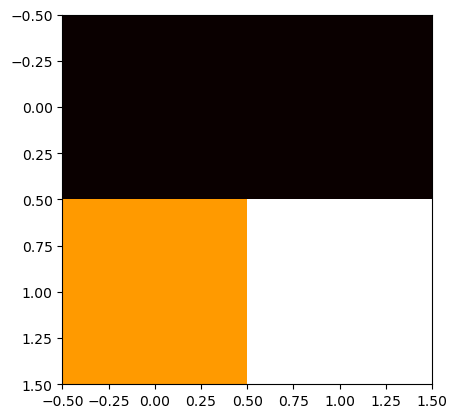

In [211]:
import matplotlib.pyplot as plt

plt.imshow(table, cmap='hot', interpolation='nearest')
plt.show()